In [1]:
import sqlite3
from cards import deck
import itertools
import numpy as np
from texas import TexasHoldThem, deck
from sqlconnection import DBManager
import seaborn as sns
import json

In [6]:
cards = [key for key in deck.keys()]


In [7]:
players_hands = [sorted(hand) for hand in itertools.combinations(cards, 2)]

In [ ]:
len(players_hands)

In [7]:
flop_hands = [sorted(hand) for hand in itertools.combinations(cards, 5)]


In [11]:
len(flop_hands)

2598960

In [ ]:
turn_hands = [sorted(hand) for hand in itertools.combinations(cards, 6)]

In [ ]:
len(turn_hands)

In [13]:
river_hands = [sorted(hand) for hand in itertools.combinations(cards, 7)]

In [14]:
len(river_hands)

133784560

In [62]:
simulations = [sum([TexasHoldThem(10).win_loss(players_hands[0]) for i in range(100)])/100 for i in range(1000)]
np.mean(simulations), np.std(simulations)

(0.236542, 0.01366170692117204)

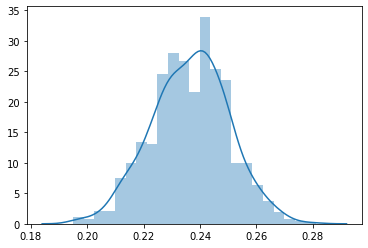

In [63]:
sns.distplot(simulations)

In [64]:
probs = [probability for probability in str(simulations)[1:-1].replace(' ','').split(',')]

In [71]:
query = """
        CREATE TABLE hands(
        cards TEXT(100),
        probability FLOAT(5, 3),
        PRIMARY KEY (cards));
"""

In [2]:
conn = DBManager('texas_holdem.db')

In [72]:
conn.query(query)

[]

In [73]:
conn.showColumnName()

cards
probability


['cards', 'probability']

In [74]:
str(players_hands[0])

'[(0, 1), (0, 13)]'

In [76]:
key = str(players_hands[0])
value = np.mean(simulations)

In [81]:
query = f'INSERT INTO hands VALUES("{key}", {value})'

In [82]:
conn.query(query)

[]

In [83]:
conn.showAll()

[('[(0, 1), (0, 13)]', 0.236542)]

In [85]:
for hand in players_hands[1:]:
    key = str(hand)
    simulations = sum([TexasHoldThem(10).win_loss(players_hands[0]) for i in range(1000)])/1000
    value = np.mean(simulations)
    query = f'INSERT INTO hands VALUES("{key}", {value})'
    conn.query(query)

In [ ]:
for hand in flop_hands:
    key = str(hand)
    simulations = sum([TexasHoldThem(10).win_loss(players_hands[0]) for i in range(1000)])/1000
    value = np.mean(simulations)
    query = f'INSERT INTO hands VALUES("{key}", {value})'
    conn.query(query)

In [ ]:
for hand in turn_hands:
    key = str(hand)
    simulations = sum([TexasHoldThem(10).win_loss(players_hands[0]) for i in range(1000)])/1000
    value = np.mean(simulations)
    query = f'INSERT INTO hands VALUES("{key}", {value})'
    conn.query(query)

In [ ]:
for hand in river_hands:
    key = str(hand)
    simulations = sum([TexasHoldThem(10).win_loss(players_hands[0]) for i in range(1000)])/1000
    value = np.mean(simulations)
    query = f'INSERT INTO hands VALUES("{key}", {value})'
    conn.query(query)

In [3]:
a = conn.showAll()

In [101]:
a = a[0][0]
a = a.replace(' ', '')
a = a.replace('(', '')
a = a.replace(')', '')
a = a.replace('[', '')
a = a.replace(']', '')

print(a)

0,1,0,13


In [97]:
tuple('(0, 1)')

('(', '0', ',', ' ', '1', ')')

In [12]:
keys = [key[0] for key in a]

In [ ]:
flop_hands = [str(hand) for hand in flop_hands if hand in keys]